## Setup

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(linewidth=170)
np.set_printoptions(suppress=True)
np.random.seed(8)

import matplotlib.pyplot as plt
%matplotlib inline

from time import time, sleep
sleep(0.2)

C:\Users\raziel lab\AppData\Local\Temp\ipykernel_37748\4262382925.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Imports & Parameters

In [2]:
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
random_state = 8

## Loading the data

In [3]:
delta_temperature_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Regression Model/Direct/delta_temperature_df.csv')
delta_temperature_df['delta_temperature'] = delta_temperature_df['delta_temperature'].astype(float)
print(delta_temperature_df.shape)
delta_temperature_df

(12, 2)


,month_number,delta_temperature
0,1,10.112043
1,2,8.800952
2,3,8.021075
3,4,3.964000
4,5,4.699140
5,6,7.152444
6,7,8.037419
7,8,7.056344
8,9,4.788667
9,10,2.078065


In [4]:
direct_model_params = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Regression Model/Direct/direct_model_params.csv')
direct_model_params.rename(columns = {'Unnamed: 0':'params'}, inplace = True)
direct_model_params.rename(columns = {'0':'coefficient'}, inplace = True)
print(direct_model_params.shape)
direct_model_params

(9, 2)


,params,coefficient
0,const,3182.636527
1,non_labs_delta_temperature_area,0.243355
2,area_sm,5.535246
3,labs_delta_temperature_area,0.274052
4,c_server,311.523954
5,wet_lab_instruments,594.518660
6,labs_c_desktop,46.416787
7,non_labs_c_desktop,40.555458
8,Group Var,8.618567


In [5]:
direct_model_19_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Regression Model/Direct/direct_model_19_df.csv')
print(direct_model_19_df.shape)
direct_model_19_df.head()

(564, 20)


,building_number,lab,c_desktop,c_laptop,c_server,r_domestic,r_industrial,r_other,f_industrial,f_domestic,cv_0,cv_1,cv_2,cv_3,cv_4,delta_temperature,est_1,area_sm,direct_consumption,indirect_consumption
0,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,10.112043,1,2953,32322.67,15.383570
1,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,8.800952,1,2953,20597.35,9.038097
2,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,8.021075,1,2953,19120.75,530.725715
3,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,3.964000,1,2953,12793.32,401.938734
4,14,0,13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,4.699140,1,2953,15889.49,9995.987708


In [6]:
direct_lmm_model_19_df = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Regression Model/Direct/direct_lmm_model_19_df.csv')
print(direct_lmm_model_19_df.shape)
direct_lmm_model_19_df.head()

(564, 12)


,building_number,lab,labs_c_desktop,non_labs_c_desktop,c_server,wet_lab_instruments,labs_delta_temperature_area,non_labs_delta_temperature_area,delta_temperature,area_sm,direct_consumption,indirect_consumption
0,14,0,0,13,0.0,0.0,0.0,29860.863011,10.112043,2953,32322.67,15.383570
1,14,0,0,13,0.0,0.0,0.0,25989.212381,8.800952,2953,20597.35,9.038097
2,14,0,0,13,0.0,0.0,0.0,23686.235269,8.021075,2953,19120.75,530.725715
3,14,0,0,13,0.0,0.0,0.0,11705.692000,3.964000,2953,12793.32,401.938734
4,14,0,0,13,0.0,0.0,0.0,13876.559785,4.699140,2953,15889.49,9995.987708


In [7]:
direct_lmm_model_19_df['delta_temperature'].iloc[10] = round(direct_lmm_model_19_df['delta_temperature'].iloc[10], 15)
delta_temperature_df['delta_temperature'].iloc[10] = round(delta_temperature_df['delta_temperature'].iloc[10], 15)

In [8]:
model_19_df_without_exceptions = direct_lmm_model_19_df.copy(deep=True)

model_19_df_without_exceptions = model_19_df_without_exceptions[model_19_df_without_exceptions['building_number'] != '95']
model_19_df_without_exceptions = model_19_df_without_exceptions[model_19_df_without_exceptions['building_number'] != '51']
model_19_df_without_exceptions = model_19_df_without_exceptions[model_19_df_without_exceptions['building_number'] != '70']

print(model_19_df_without_exceptions.shape)

(528, 12)


In [9]:
model_19_df_without_exceptions_non_labs = model_19_df_without_exceptions[model_19_df_without_exceptions['lab'] == 0]
num_of_non_labs = model_19_df_without_exceptions_non_labs.shape[0]/12
print(model_19_df_without_exceptions_non_labs.shape)

(324, 12)


In [10]:
model_19_df_without_exceptions_labs = model_19_df_without_exceptions[model_19_df_without_exceptions['lab'] == 1]
num_of_labs = model_19_df_without_exceptions_labs.shape[0]/12
print(model_19_df_without_exceptions_labs.shape)

(204, 12)


In [11]:
months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']

# Pie Graphs

### Direct Consumption Distribution - All University (Year)

In [12]:
all_university_detailed_labels = 'Non-Labs: Air Condition Systems & Fan Coils', 'Labs: Air Condition Systems & Fan Coils', 'Lighting', 'Servers & Related Equipment', 'Wet Laboratory Instruments', 'Non-Labs: Desktops', 'Labs: Desktops', 'Others'

In [13]:
all_university_detailed_colors = np.array(['cornflowerblue', 'royalblue', 'burlywood', 'deeppink', 'lightgreen', 'salmon', 'tomato', 'grey'])

In [14]:
yearly_kwh_non_labs_delta_temperature_area = (direct_model_params['coefficient'][direct_model_params['params'] == 'non_labs_delta_temperature_area']*sum(model_19_df_without_exceptions['non_labs_delta_temperature_area'])).iloc[0]

yearly_kwh_labs_delta_temperature_area = (direct_model_params['coefficient'][direct_model_params['params'] == 'labs_delta_temperature_area']*sum(model_19_df_without_exceptions['labs_delta_temperature_area'])).iloc[0]

yearly_kwh_area = (direct_model_params['coefficient'][direct_model_params['params'] == 'area_sm']*sum(model_19_df_without_exceptions['area_sm'])).iloc[0]

yearly_kwh_c_server = (direct_model_params['coefficient'][direct_model_params['params'] == 'c_server']*sum(model_19_df_without_exceptions['c_server'])).iloc[0]

yearly_kwh_wet_lab_instruments = (direct_model_params['coefficient'][direct_model_params['params'] == 'wet_lab_instruments']*sum(model_19_df_without_exceptions['wet_lab_instruments'])).iloc[0]

yearly_kwh_non_labs_c_desktop = (direct_model_params['coefficient'][direct_model_params['params'] == 'non_labs_c_desktop']*sum(model_19_df_without_exceptions['non_labs_c_desktop'])).iloc[0]

yearly_kwh_labs_c_desktop = (direct_model_params['coefficient'][direct_model_params['params'] == 'labs_c_desktop']*sum(model_19_df_without_exceptions['labs_c_desktop'])).iloc[0]

yearly_kwh_random = sum(model_19_df_without_exceptions['direct_consumption']) - (yearly_kwh_non_labs_delta_temperature_area+yearly_kwh_labs_delta_temperature_area+yearly_kwh_area+
                                                                                 yearly_kwh_c_server+yearly_kwh_wet_lab_instruments+yearly_kwh_non_labs_c_desktop+yearly_kwh_labs_c_desktop)

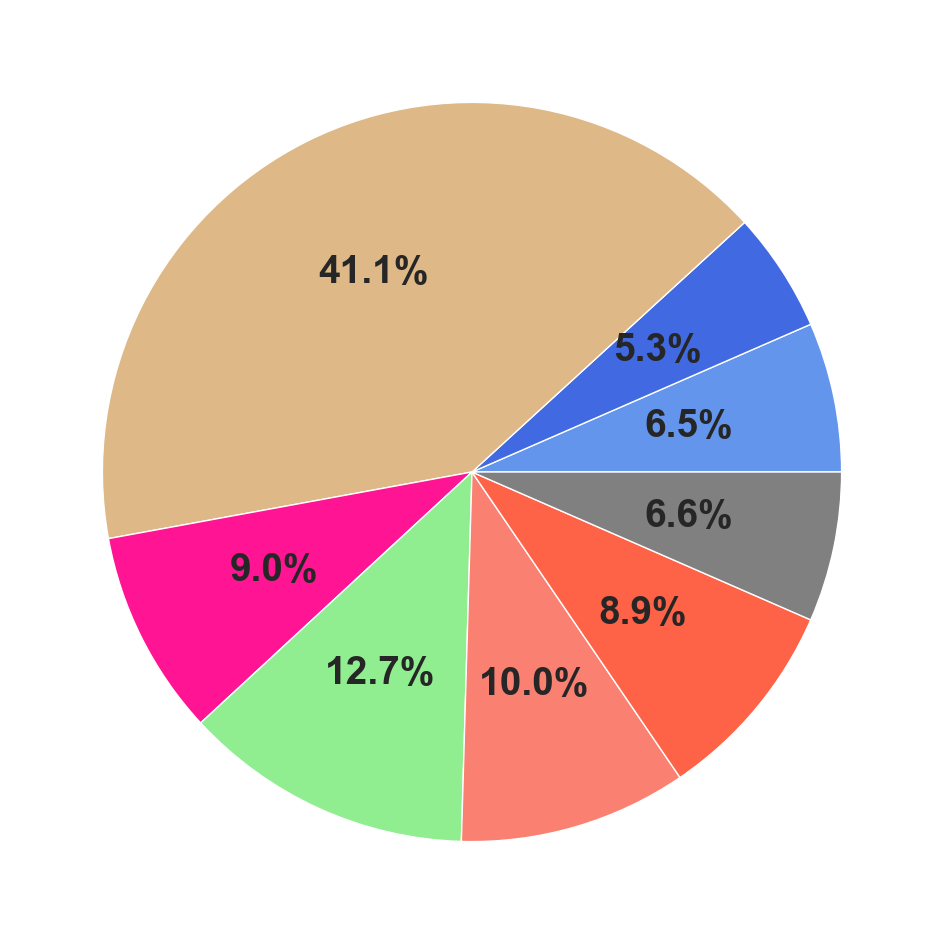

In [15]:
plt.figure(figsize=(25,12))

# graph_title = 'Direct Consumption Distribution - All University (Year)'
# plt.title(graph_title, fontsize=18)

all_university_yearly_sizes = np.array([yearly_kwh_non_labs_delta_temperature_area,
                                        yearly_kwh_labs_delta_temperature_area,
                                        yearly_kwh_area,
                                        yearly_kwh_c_server,
                                        yearly_kwh_wet_lab_instruments,
                                        yearly_kwh_non_labs_c_desktop,
                                        yearly_kwh_labs_c_desktop,
                                        yearly_kwh_random])

# plt.pie(all_university_yearly_sizes, labels=all_university_detailed_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors = all_university_detailed_colors)
plt.pie(all_university_yearly_sizes, autopct='%1.1f%%', textprops={'fontsize': 28, 'weight': 'bold'}, colors = all_university_detailed_colors)

plt.savefig('Direct Consumption Distribution - All University (detaild).png')
plt.show()

In [16]:
print("Total Direct Consumption - All University (Year): ", sum(all_university_yearly_sizes))

Total Direct Consumption - All University (Year):  25650498.67


### Direct Consumption Distribution - Labs / Non-Labs (Year)

#### Non-Labs

In [17]:
labs_non_labs_labels_detailed_labels = 'Air Condition Systems & Fan Coils', 'Lighting', 'Servers & Related Equipment', 'Wet Laboratory Instruments', 'Desktops', 'Others'

In [18]:
non_labs_labels_detailed_colors = np.array(['cornflowerblue', 'burlywood', 'deeppink', 'lightgreen', 'salmon', 'grey'])

labs_labels_detailed_colors = np.array(['royalblue', 'burlywood', 'deeppink', 'lightgreen', 'tomato', 'grey'])

In [19]:
yearly_non_labs_kwh_delta_temperature_area = (direct_model_params['coefficient'][direct_model_params['params'] == 'non_labs_delta_temperature_area']*sum(model_19_df_without_exceptions_non_labs['non_labs_delta_temperature_area'])).iloc[0]

yearly_non_labs_kwh_area = (direct_model_params['coefficient'][direct_model_params['params'] == 'area_sm']*sum(model_19_df_without_exceptions_non_labs['area_sm'])).iloc[0]

yearly_non_labs_kwh_server = (direct_model_params['coefficient'][direct_model_params['params'] == 'c_server']*sum(model_19_df_without_exceptions_non_labs['c_server'])).iloc[0]

yearly_non_labs_kwh_wet_lab_instruments = (direct_model_params['coefficient'][direct_model_params['params'] == 'wet_lab_instruments']*sum(model_19_df_without_exceptions_non_labs['wet_lab_instruments'])).iloc[0]

yearly_non_labs_kwh_c_desktop = (direct_model_params['coefficient'][direct_model_params['params'] == 'non_labs_c_desktop']*sum(model_19_df_without_exceptions_non_labs['non_labs_c_desktop'])).iloc[0]

yearly_non_labs_kwh_random = sum(model_19_df_without_exceptions_non_labs['direct_consumption']) - (yearly_non_labs_kwh_delta_temperature_area+yearly_non_labs_kwh_area+yearly_non_labs_kwh_server+
                                                                                          yearly_non_labs_kwh_wet_lab_instruments+yearly_non_labs_kwh_c_desktop)

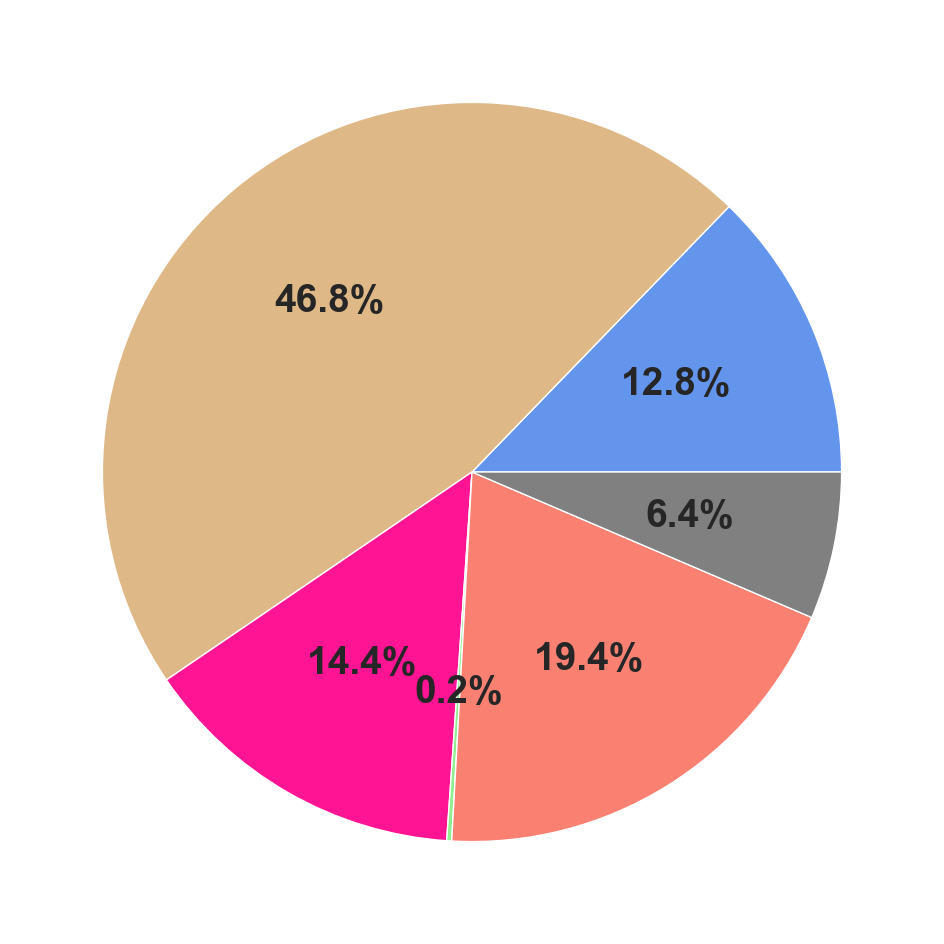

In [20]:
plt.figure(figsize=(25,12))

# graph_title = 'Direct Consumption Distribution - Non-Labs (Year)'
# plt.title(graph_title, fontsize=18)

non_labs_yearly_sizes = np.array([yearly_non_labs_kwh_delta_temperature_area,
                                 yearly_non_labs_kwh_area,
                                 yearly_non_labs_kwh_server,
                                 yearly_non_labs_kwh_wet_lab_instruments,
                                 yearly_non_labs_kwh_c_desktop,
                                 yearly_non_labs_kwh_random])

# plt.pie(non_labs_yearly_sizes, labels=labs_non_labs_labels_detailed_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=non_labs_labels_detailed_colors)
plt.pie(non_labs_yearly_sizes, autopct='%1.1f%%', textprops={'fontsize': 28, 'weight': 'bold'}, colors=non_labs_labels_detailed_colors)

plt.savefig('Direct Consumption Distribution - Non-Labs.png')
plt.show()

In [21]:
print("Total Direct Consumption - Non-Labs (Year): ", sum(non_labs_yearly_sizes), 'For ', int(num_of_non_labs), ' Non-Labs Buildings')

Total Direct Consumption - Non-Labs (Year):  13162349.650000006 For  27  Non-Labs Buildings


#### Labs

In [22]:
yearly_labs_kwh_delta_temperature_area = (direct_model_params['coefficient'][direct_model_params['params'] == 'labs_delta_temperature_area']*sum(model_19_df_without_exceptions_labs['labs_delta_temperature_area'])).iloc[0]

yearly_labs_kwh_area = (direct_model_params['coefficient'][direct_model_params['params'] == 'area_sm']*sum(model_19_df_without_exceptions_labs['area_sm'])).iloc[0]

yearly_labs_kwh_server = (direct_model_params['coefficient'][direct_model_params['params'] == 'c_server']*sum(model_19_df_without_exceptions_labs['c_server'])).iloc[0]

yearly_labs_kwh_wet_lab_instruments = (direct_model_params['coefficient'][direct_model_params['params'] == 'wet_lab_instruments']*sum(model_19_df_without_exceptions_labs['wet_lab_instruments'])).iloc[0]

yearly_labs_kwh_c_desktop = (direct_model_params['coefficient'][direct_model_params['params'] == 'labs_c_desktop']*sum(model_19_df_without_exceptions_labs['labs_c_desktop'])).iloc[0]

yearly_labs_kwh_random = sum(model_19_df_without_exceptions_labs['direct_consumption']) - (yearly_labs_kwh_delta_temperature_area+yearly_labs_kwh_area+yearly_labs_kwh_server+
                                                                                           yearly_labs_kwh_wet_lab_instruments+yearly_labs_kwh_c_desktop)

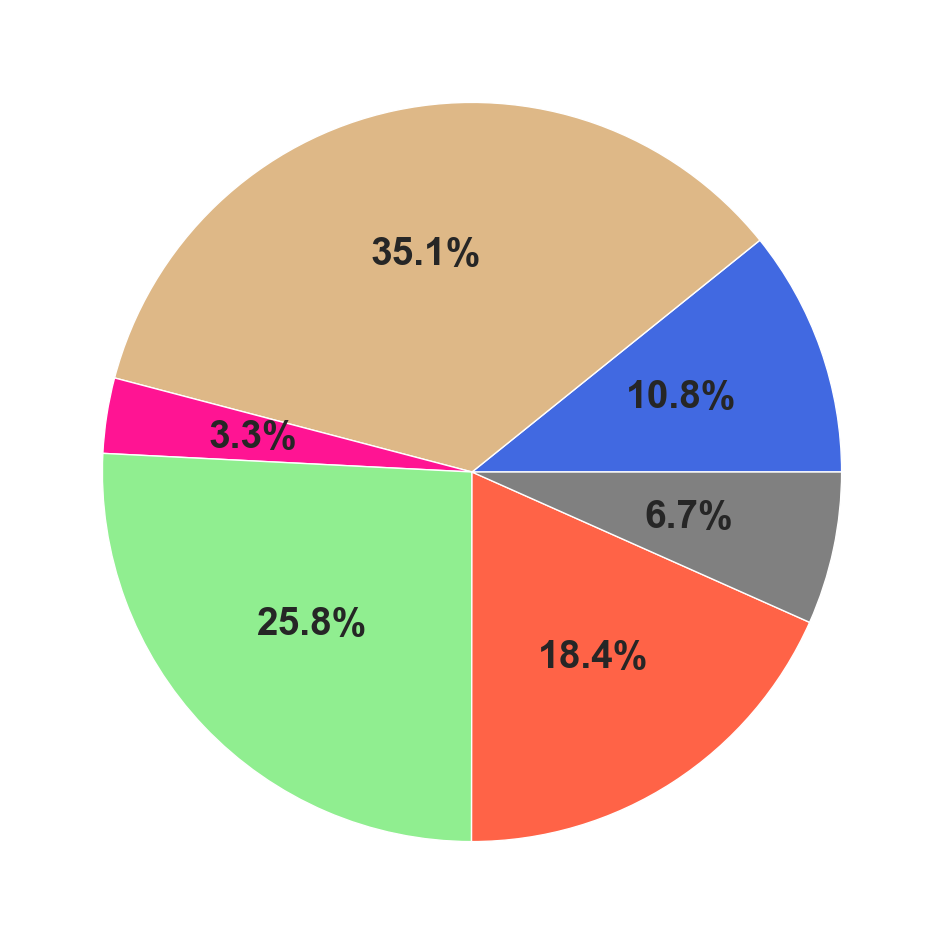

In [23]:
plt.figure(figsize=(25,12))

# graph_title = 'Direct Consumption Distribution - Labs (Year)'
# plt.title(graph_title, fontsize=18)

labs_yearly_sizes = np.array([yearly_labs_kwh_delta_temperature_area,
                              yearly_labs_kwh_area,
                              yearly_labs_kwh_server,
                              yearly_labs_kwh_wet_lab_instruments,
                              yearly_labs_kwh_c_desktop,
                              yearly_labs_kwh_random])

# plt.pie(labs_yearly_sizes, labels=labs_non_labs_labels_detailed_labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors = labs_labels_detailed_colors)
plt.pie(labs_yearly_sizes, autopct='%1.1f%%', textprops={'fontsize': 28, 'weight': 'bold'}, colors = labs_labels_detailed_colors)

plt.savefig('Direct Consumption Distribution - Labs.png')
plt.show()

In [24]:
print("Total Direct Consumption - Labs (Year): ", sum(labs_yearly_sizes), 'For ', int(num_of_labs), ' Labs Buildings')

Total Direct Consumption - Labs (Year):  12488149.019999996 For  17  Labs Buildings
